In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
from shelllock import PyCCELL_PRFQT as px

In [2]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (8,5)
sns.set_palette("colorblind")
path= '../images/SHERLOCK/'

In [3]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

In [4]:
targets = px.mainf('../results/SHERLOCK/Ecoli/ecolitarget_2.xlsx'
               ,50,"YES",'line',['D12','D13','D14'])


KeyError: "None of [Float64Index([nan, nan, nan], dtype='float64', name=0)] are in the [columns]"

targets.columns

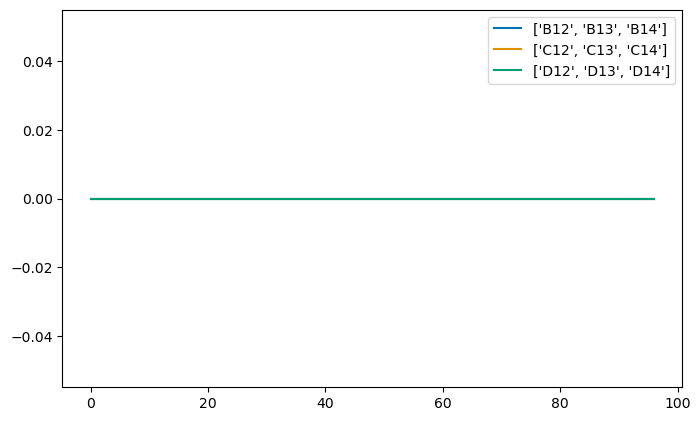

In [5]:
for i in targets.columns[0:3]:
    if i != 'Time':
        targets[i].plot()
        
plt.legend()

In [38]:
ecoli = px.mainf('../results/SHERLOCK/Ecoli/exp.xlsx'
               ,50,"NO",'line',['N15','N16','N17'])


In [39]:
ecoli.columns

Index(['['F12', 'F13', 'F14']', '['G12', 'G13', 'G14']',
       '['H12', 'H13', 'H14']', '['I12', 'I13', 'I14']',
       '['J12', 'J13', 'J14']', '['K12', 'K13', 'K14']',
       '['L12', 'L13', 'L14']', '['M12', 'M13', 'M14']',
       '['N12', 'N13', 'N14']', '['N15', 'N16', 'N17']',
                        'Time',                       0,
                             1,                       2,
                             3,                       4,
                             5,                       6,
                             7,                       8,
                             9],
      dtype='object')

In [40]:
names = ['Positive Control','Positive Control','ToxR_10µM','ToxR_1µM','ToxR_10nM','DnaJ07_10nM',
         'Ecoli_t1_10mM','Ecoli_t1_1µM','Ecoli_t2','NC','Time']
sd = [x+'_sd' for x in names]
counter = 0
for i in range(len(ecoli.columns)):
    if i > 10:
        ecoli.rename(columns={ecoli.columns[i]:sd[counter]},inplace=True)
        counter+=1
    else:
        ecoli.rename(columns={ecoli.columns[i]:names[i]},inplace=True)
       
    
    

In [41]:
ecoli.columns

Index(['Positive Control', 'Positive Control', 'ToxR_10µM', 'ToxR_1µM',
       'ToxR_10nM', 'DnaJ07_10nM', 'Ecoli_t1_10mM', 'Ecoli_t1_1µM', 'Ecoli_t2',
       'NC', 'Time', 'Positive Control_sd', 'Positive Control_sd',
       'ToxR_10µM_sd', 'ToxR_1µM_sd', 'ToxR_10nM_sd', 'DnaJ07_10nM_sd',
       'Ecoli_t1_10mM_sd', 'Ecoli_t1_1µM_sd', 'Ecoli_t2_sd', 'NC_sd'],
      dtype='object')

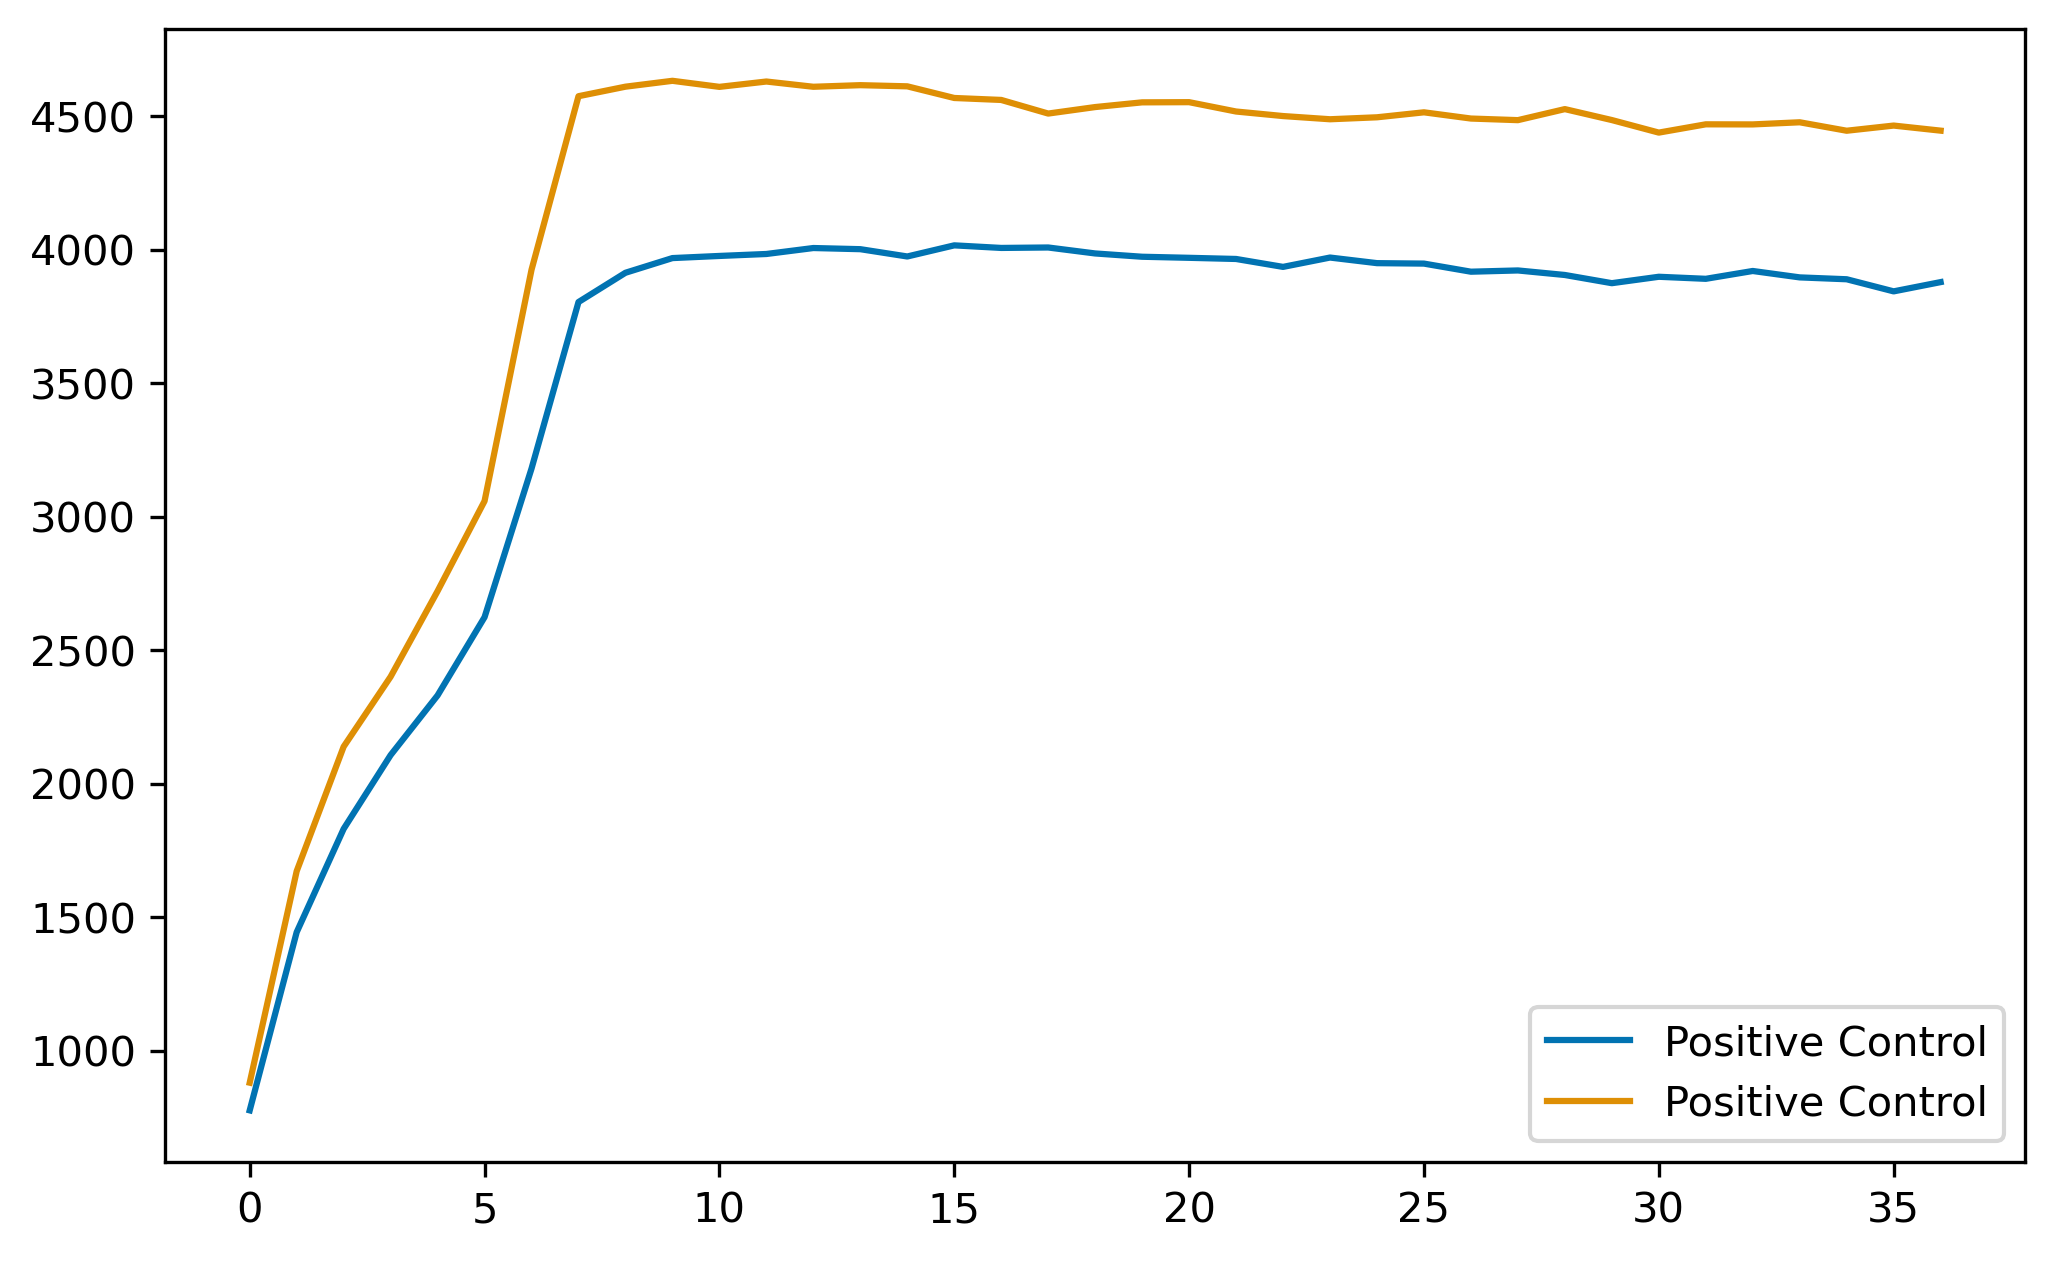

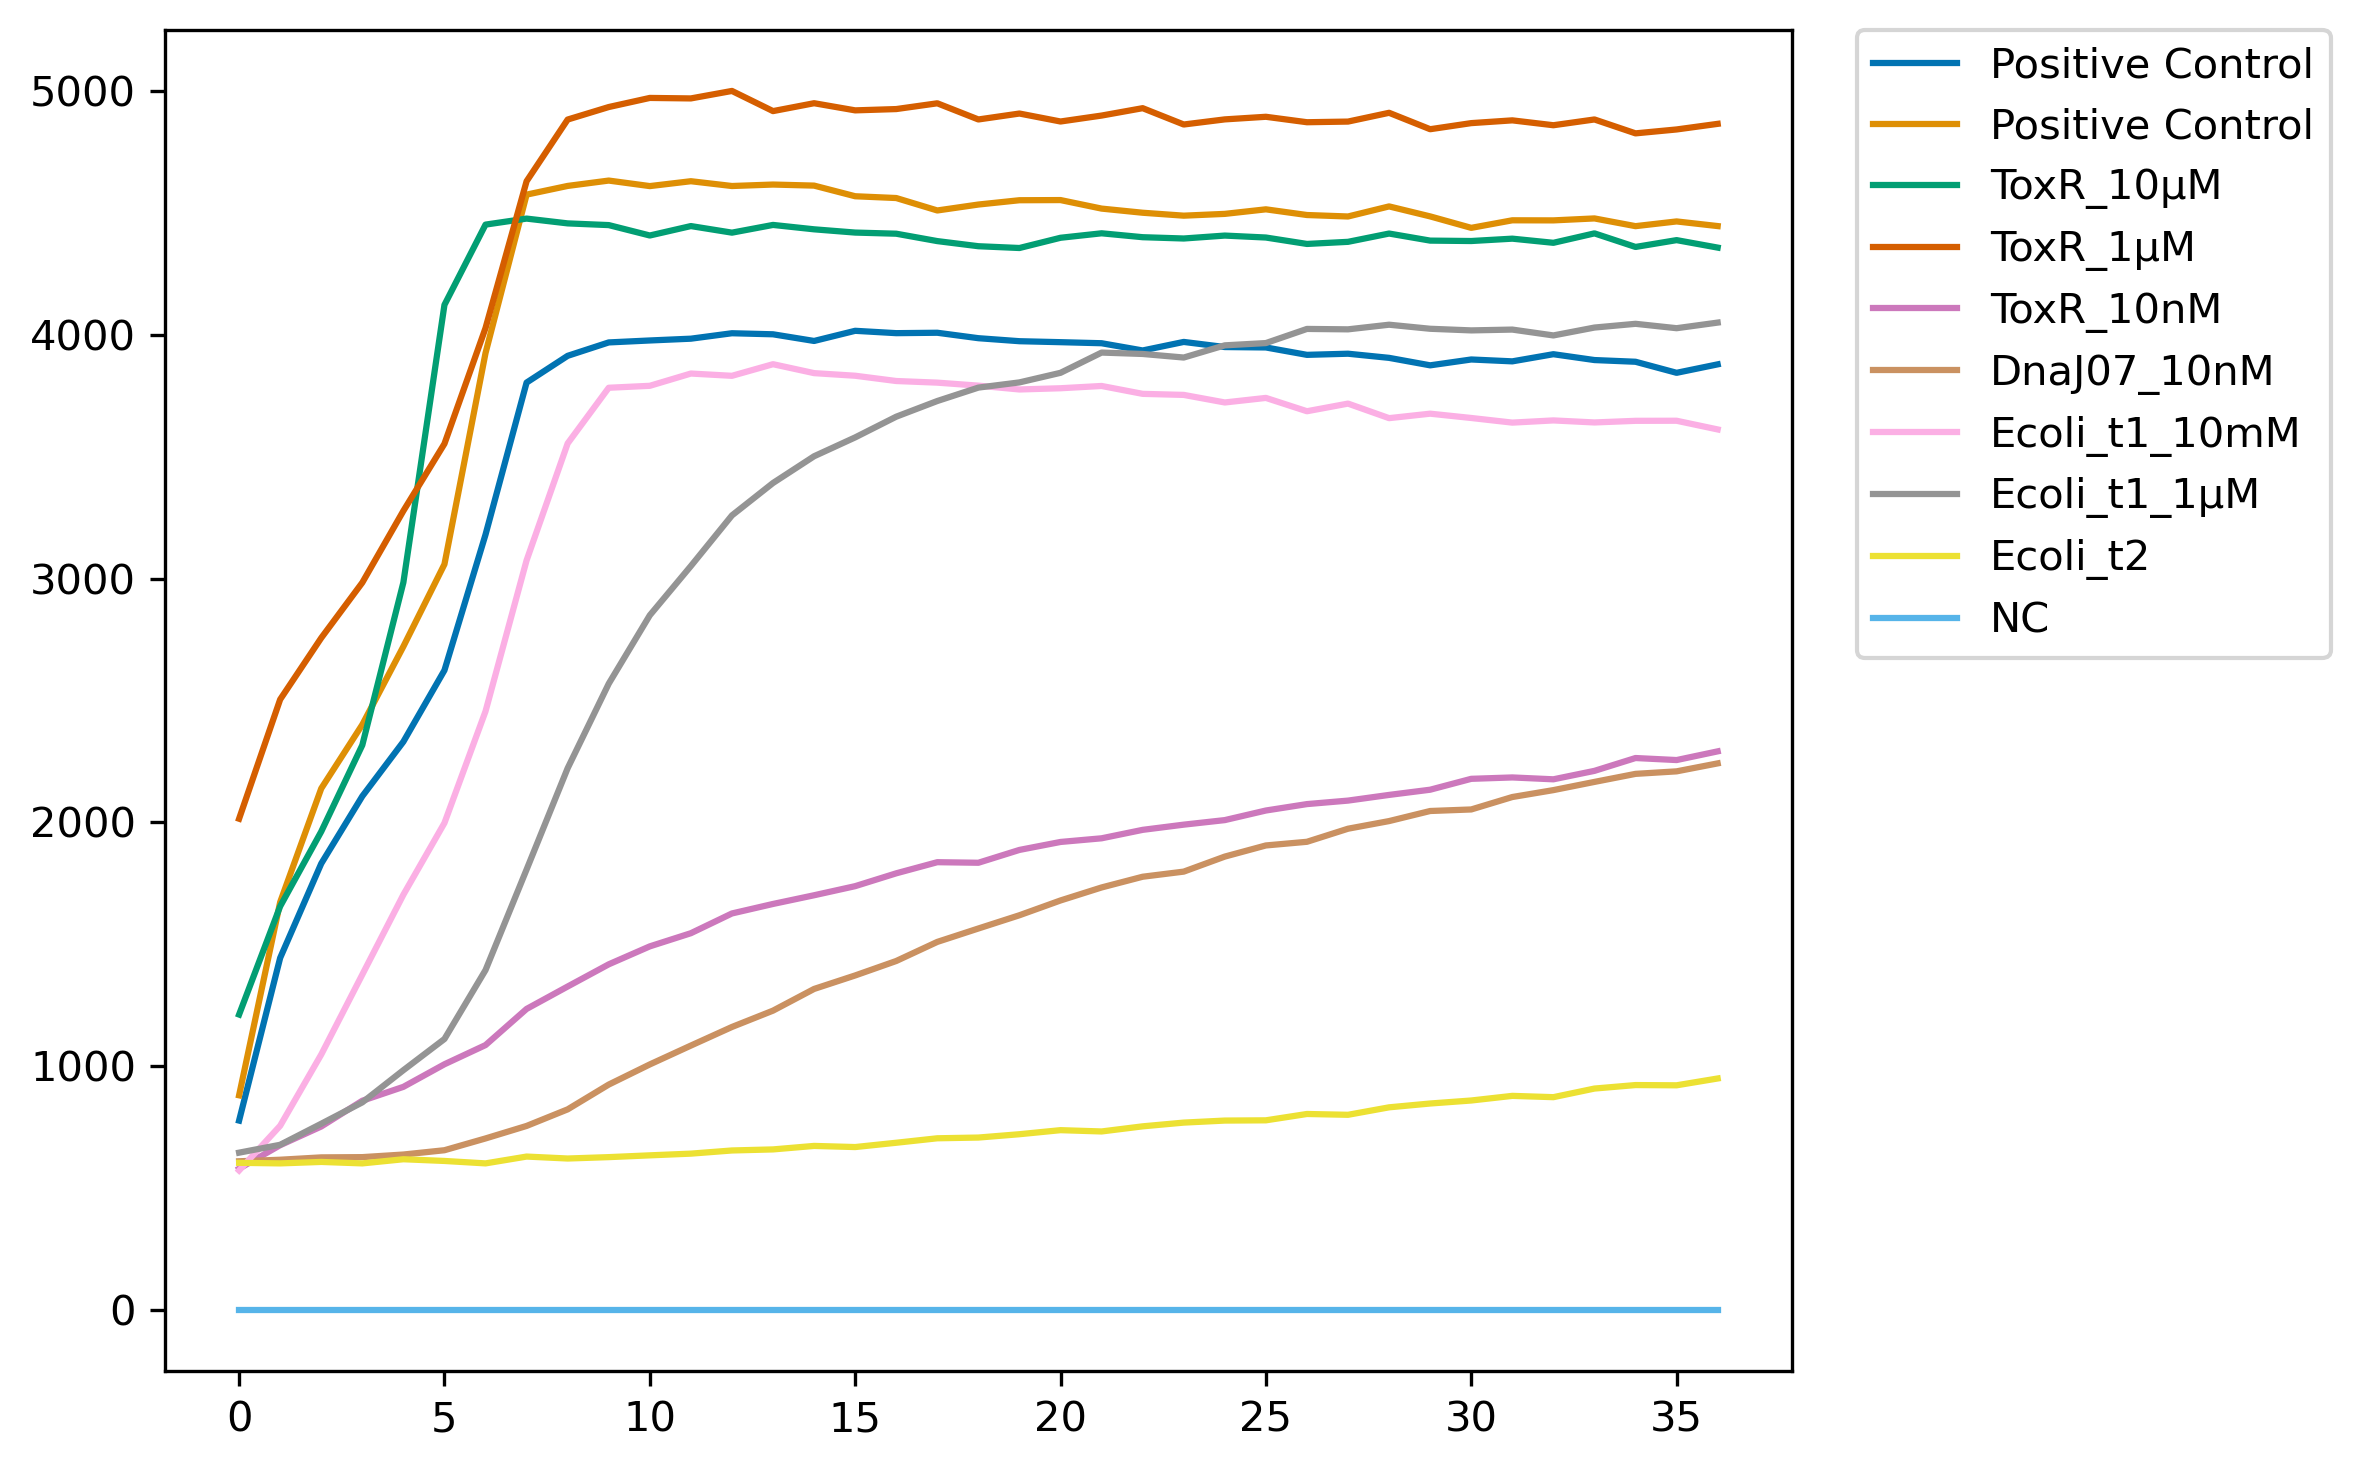

In [43]:
for i in ecoli.columns[0:10]:
    if i != 'Time':
        ecoli[i].plot()
        
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.tight_layout()
#plt.savefig(path+'ecoli.png')
plt.show()

In [53]:
ecoli.Time.values

array([  0,  13,  26,  39,  52,  65,  78,  91, 104, 117, 130, 143, 156,
       169, 182, 195, 208, 221, 234, 247, 260, 273, 286, 299, 312, 325,
       338, 351, 364, 377, 390, 403, 416, 429, 442, 455, 468], dtype=int64)

['Ecoli_t1_1µM', 'Ecoli_t2']


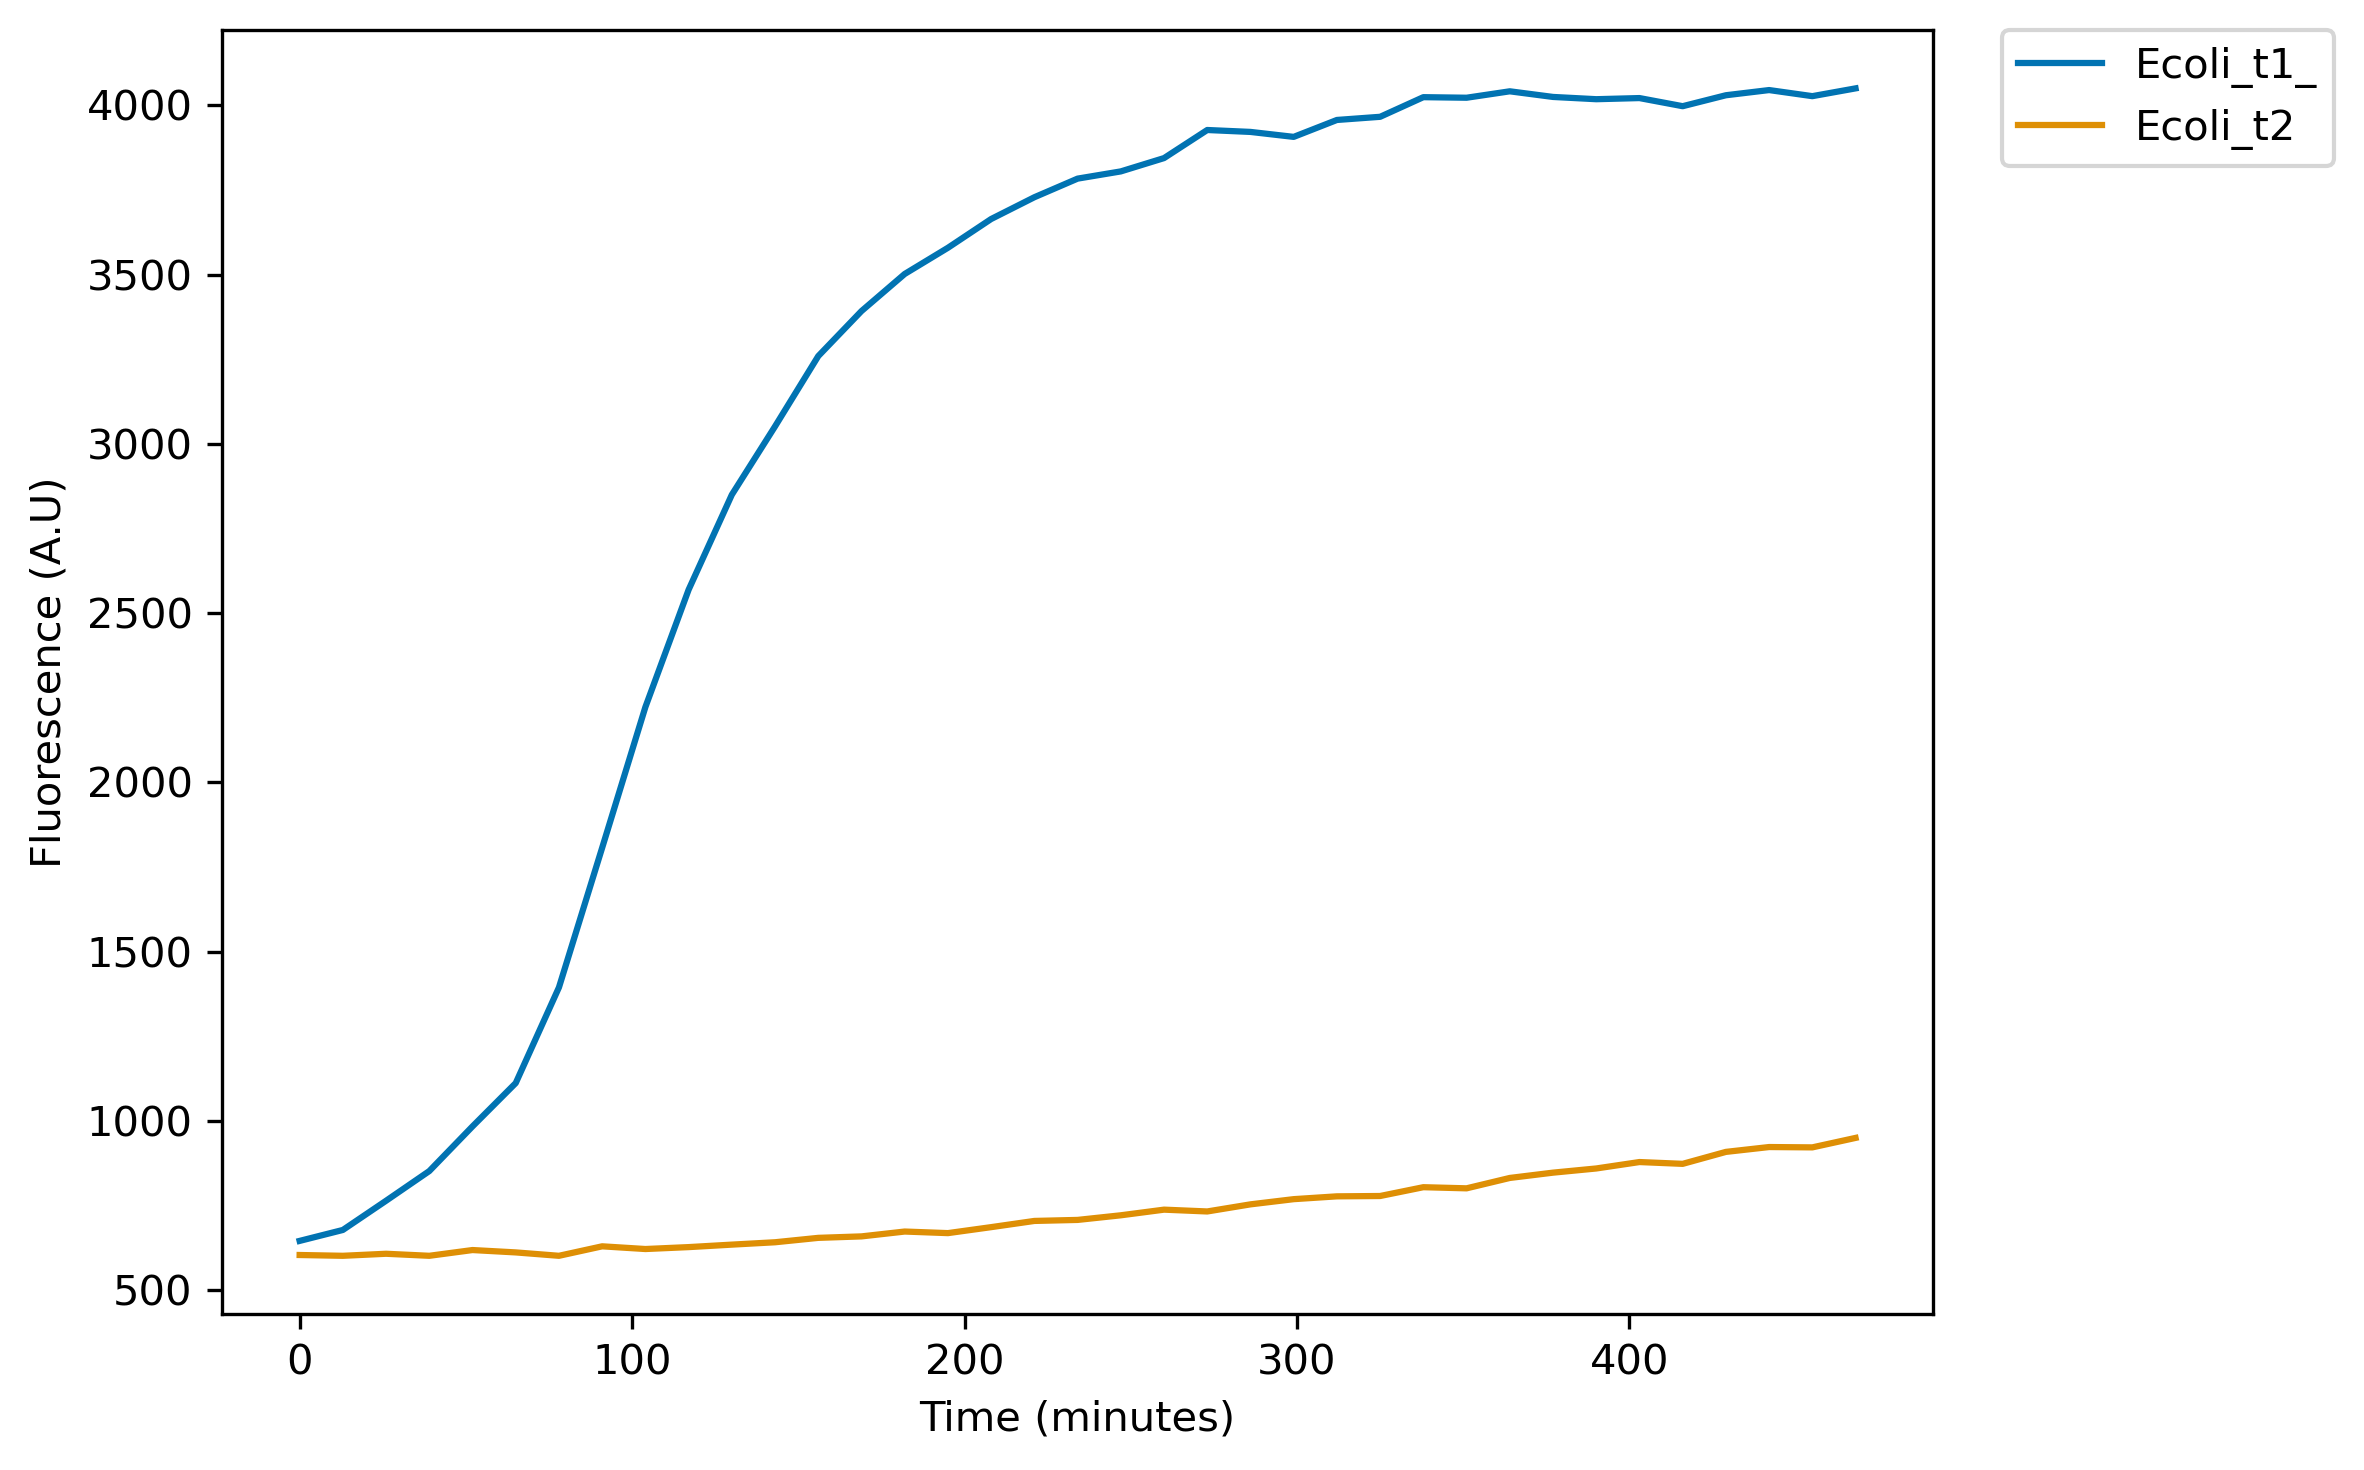

In [56]:
n = [ x for x in ecoli.columns if 'Ecoli' in x and '_sd' not in x and '10mM' not in x]
print( n)
for i in n:
    plt.plot(ecoli.Time.values,ecoli[i],label=i.strip('1µM'))
        
plt.ylabel('Fluorescence (A.U)')
plt.xlabel('Time (minutes)')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.tight_layout()
plt.savefig(path+'ecoli_targets.png')
plt.show()